This notebook demonstrates how to perfomr systematic the policy assessment and render the policy cards. 

In [11]:
%load_ext autoreload
%autoreload 2

import pandas as pd

from res_ind_lib import *

#Imports the function to plot render the policy experiments
from policy_assessment import *

#ask jupyter to display the plots within this notebook
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data

## baseline data

In [12]:
#Load the excel data file into a dataframe (table)
df_original=pd.read_excel("inputs/all_data_compiled.xlsx", 
                 index_col=0, #tells Pandas to use the first column (Provinces) as the index of the table
                 skiprows=[0, 2] #The first (0) row is a description of the variables and the 3rd (2) row is empty. We skip them
                ).dropna() 
df_original.index.name="province"
#Displays the first rows of that dataframe
df_original=def_ref_values(df_original)


## policy experiment data

In [13]:
##POLICY DESCRIPTION
policy_info= pd.read_csv("inputs/policy_description.csv",index_col=0)

#Policy Labels (y axis)
policy_labels = policy_info.descriptor.copy() #we make a copy so we can modify it later
policy_labels.head()

#size of the policy
pol_increment = policy_info.increment    

# Parameters

In [14]:
colors = pd.read_csv("inputs/colors_pol_assess.csv", index_col=0)
colors

,color,edgecolor,alpha
dWtot_currency,#a6cee3,#1f78b4,1
dKtot,#cccccc,#969696,1


In [15]:
#unit for welfare and asset loses changes
unit = dict(multiplier = 1e-3, string = "million pesos per year"       )

In [16]:
pol_assess_set = colors.index

# Checking for out of bound problems

In [17]:
bounds= pd.read_csv("inputs/inputs_info.csv", index_col="key")
bounds.head(3)   

,descriptor,inf,sup
key,,,
avg_prod_k,Productivity of capital,0,10
dcap,Average consumption losses for poor people in ...,0,NaN
dcar,Average consumption losses for nonpoor people ...,0,NaN


In [18]:
clipped = check_bounds(df_original+pol_increment, bounds)

# Computing

In [19]:
deltas = compute_policies(df_original,pol_increment,pol_assess_set, bounds)
deltas.head()

Currently working on:  done.


province             Abra                Agusan del Norte                 \
outputs             dKtot dWtot_currency            dKtot dWtot_currency   
inputs                                                                     
T_rebuild_K      0.000000    2316.199320         0.000000    7368.999901   
cp               1.064374      -2.439797         3.531657      -9.829346   
cr               2.597972      -1.837104         8.012368      -4.602890   
fap           1976.094957    9075.499797      5816.527876   32434.333252   
far          10594.082207   15012.332172     37628.695957   43338.587033   

province    Agusan del Sur                        Aklan                 \
outputs              dKtot dWtot_currency         dKtot dWtot_currency   
inputs                                                                   
T_rebuild_K       0.000000    8823.943899      0.000000    8246.261712   
cp                5.037506     -13.951178      2.882841      -8.567393   
cr                7.359178      -4.900220      9.735502      -6.636972   
fap            8392.896007   46563.476751   4580.594968   27300.365772   
far           31804.532387   42414.448736  41204.442231   56364.677958   

province            Albay                     ...           Tawi-tawi  \
outputs             dKtot dWtot_currency      ...               dKtot   
inputs                                        ...                       
T_rebuild_K      0.000000   16094.109332      ...            0.000000   
cp               9.051918     -27.579734      ...            0.785464   
cr              14.387263      -8.911759      ...            3.190301   
fap          13864.317914   84690.557931      ...         1764.256184   
far          64457.407233   80045.214674      ...        12107.567935   

province                        Zambales                Zamboanga Sibugay  \
outputs     dWtot_currency         dKtot dWtot_currency             dKtot   
inputs                                                                      
T_rebuild_K    2467.860499      0.000000    7604.511892          0.000000   
cp               -1.372962      2.053179      -4.513824          6.457917   
cr               -2.542088     10.749894      -7.666912          8.663028   
fap            6169.231525   3876.152550   17072.732383       9879.644986   
far           19306.564430  43462.616725   62116.867407      34469.876753   

province                   Zamboanga del Norte                 \
outputs     dWtot_currency               dKtot dWtot_currency   
inputs                                                          
T_rebuild_K   11734.642714            0.000000   18240.809838   
cp              -20.437605           11.479098     -50.660969   
cr               -6.624761            9.918107      -7.668757   
fap           62720.921286        13927.579271  123212.807217   
far           52851.472422        38596.936252   59824.546631   

province    Zamboanga del Sur                 
outputs                 dKtot dWtot_currency  
inputs                                        
T_rebuild_K          0.000000   28834.306749  
cp                  12.612229     -37.262592  
cr                  29.403021     -20.004997  
fap              20003.989765  118547.752012  
far             125363.854149  171042.533565  

[5 rows x 166 columns]

# actual drawing

In [20]:
deltas.index

Index(['T_rebuild_K', 'cp', 'cr', 'fap', 'far', 'gdp_pc_pp', 'pi', 'pov_head',
       'protection', 'shewp', 'shewr', 'sigma_p', 'sigma_r', 'social_p',
       'social_r', 'v_p', 'v_r'],
      dtype='object', name='inputs')

Currently working on:  Bulacan


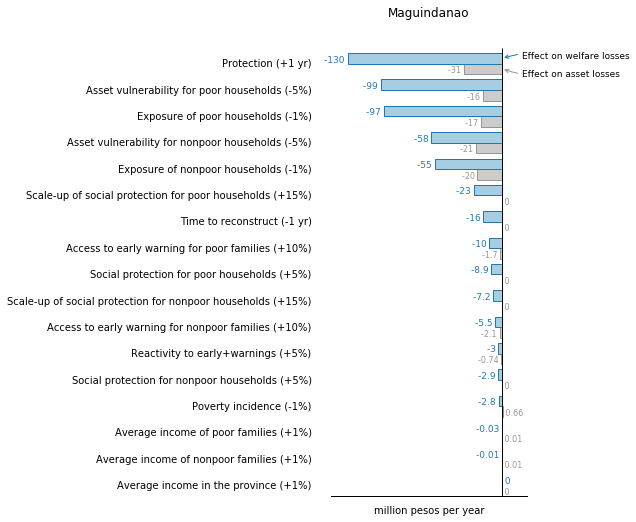

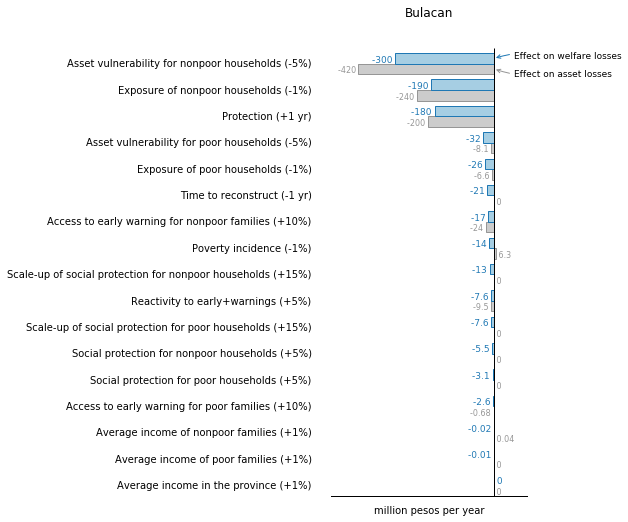

In [21]:
render_pol_cards(
    deltas,
    colors,
    policy_labels,
    pol_increment,
    unit,
        ["Maguindanao", "Bulacan"])
#     df_original.index)


# Merge all cards to single pdf

Merges the individual province cards into one big multi page pdf. Requires ghostscript.

In [22]:
province_list=glob.glob("cards/*.pdf")
merge_cardfiles(province_list,"all_cards.pdf")

Merging cards....
Merging cards done


Converts the pdf files to png images. Requires Imagemagick.

In [23]:
convert_pdf_to_png("cards/")

Converting cards....
conversion to png done


# Demo: policy experiments on the multi-hazard data

Here we demonstrate how to do policy experiments on the multi hazard data. This is just a demo as the data we have now prevents us to have meaningful experiments (river floods and costal floods)

In [24]:
multi_hard_info=pd.read_csv("inputs/multi_hazard_data.csv", index_col=["province","hazard"])
multi_hard_info.head()

OSError: File b'inputs/multi_hazard_data.csv' does not exist

In [ ]:
fr=pd.read_csv("inputs/fa_ratios.csv", index_col=("province","hazard")).dropna()
fr.columns = fr.columns.astype(float)
fr.head()

## policy experiments on mh data

In [ ]:
##POLICY DESCRIPTION
policy_info_mh= pd.read_csv("inputs/policy_multihazard_description.csv",index_col=0)

#Policy Labels (y axis)
policy_labels_mh = policy_info_mh.descriptor.copy() #we make a copy so we can modify it later
policy_labels_mh.head()

#size of the policy
pol_increment_mh = policy_info_mh.increment    
pol_increment_mh.head()


## computation

In [ ]:
d_mh = compute_policies_mh(df_original,multi_hard_info,pol_increment_mh,pol_assess_set, bounds, fa_ratios=fr, multihazard_data =multi_hard_info)

## baseline mh data

In [ ]:
render_pol_cards(
    deltas.append(d_mh).drop("fap").drop("far"), #drop fap and far because superseded by multihazard info
    colors,
    policy_labels.append(policy_labels_mh),
    pol_increment.append(pol_increment_mh),
    unit,["Maguindanao"],
    outfolder="cards_coast_river/"
)

